# Individuals Cyber Attacks Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../Data Warehousing ETL/Transformed_Data/individuals_cyber_attacks_europe.csv')

In [2]:
data.columns

Index(['Timestamp', 'Source_IP_Address', 'Destination_IP_Address',
       'Source_Port', 'Destination_Port', 'Protocol', 'Packet_Length',
       'Packet_Type', 'Traffic_Type', 'Payload_Data', 'Malware_Indicators',
       'Anomaly_Scores', 'Alerts_Warnings', 'Attack_Type', 'Attack_Signature',
       'Action_Taken', 'Severity_Level', 'User_Information', 'Network_Segment',
       'Proxy_Information', 'Firewall_Logs', 'IDS_IPS_Alerts', 'Log_Source',
       'Country', 'Source_Country', 'Valid_Source_IP', 'Valid_Destination_IP',
       'Day', 'Hour_of_Day', 'Month', 'Year', 'Browser', 'Operating_System',
       'Device_Type'],
      dtype='object')

## General Analysis

In [3]:
attacks_per_year = data.groupby('Year').size()

print("\nTotal Attacks per Year:")
print(attacks_per_year)



Total Attacks per Year:
Year
2018     5061
2019     4939
2020    10573
2021    10538
2022    10750
2023     8139
dtype: int64


In [4]:
attacks_per_country = data.groupby('Country').size()

top_countries_attacks = attacks_per_country.sort_values(ascending=False).head(10)

print("Top Countries with the Most Attacks:")
print(top_countries_attacks)


Top Countries with the Most Attacks:
Country
Italy          11553
UK              8788
Belgium         8113
Spain           5686
Germany         4676
France          4592
Poland          4369
Sweden          1156
Netherlands      537
Denmark          530
dtype: int64


In [5]:
avg_packet_length_per_year = data.groupby('Year')['Packet_Length'].mean()

print("\nAverage Packet Length per Year:")
print(avg_packet_length_per_year)



Average Packet Length per Year:
Year
2018    798.143845
2019    803.546872
2020    785.749645
2021    780.612355
2022    778.107907
2023    781.376705
Name: Packet_Length, dtype: float64


In [6]:
avg_packet_length_per_protocol = data.groupby('Protocol')['Packet_Length'].mean()

print("\nAverage Packet Length per Protocol:")
print(avg_packet_length_per_protocol)



Average Packet Length per Protocol:
Protocol
ICMP    786.522400
TCP     778.620953
UDP     786.411569
Name: Packet_Length, dtype: float64


In [7]:
common_attack_types = data.groupby('Attack_Type').size().sort_values(ascending=False).head(10)
print("Most Common Attack Types:")
print(common_attack_types)


Most Common Attack Types:
Attack_Type
Malware                15019
DDoS                   13428
Intrusion              13265
Ransomware              1712
Supply Chain Attack     1698
Denial of Service       1649
Phishing                1622
Data Breach             1607
dtype: int64


In [8]:
severity_distribution = data.groupby('Severity_Level').size()
print("\nSeverity Distribution:")
print(severity_distribution)



Severity Distribution:
Severity_Level
High       7622
Low       34850
Medium     7528
dtype: int64


In [9]:
common_device_types = data.groupby('Device_Type').size().sort_values(ascending=False)
print("\nMost Common Device Types:")
print(common_device_types)



Most Common Device Types:
Device_Type
Desktop    38683
Mobile     11317
dtype: int64


In [10]:
attacks_per_hour = data.groupby('Hour_of_Day').size()
print("Attacks per Hour of the Day:")
print(attacks_per_hour)


Attacks per Hour of the Day:
Hour_of_Day
0     2093
1     2048
2     2049
3     2039
4     2136
5     2079
6     2057
7     2084
8     2103
9     2040
10    2115
11    2103
12    2015
13    2148
14    2119
15    2142
16    2083
17    2090
18    2101
19    2044
20    2133
21    2082
22    2007
23    2090
dtype: int64


In [11]:
attacks_per_month = data.groupby('Month').size()
print("\nAttacks per Month:")
print(attacks_per_month)



Attacks per Month:
Month
1     4224
2     3951
3     4539
4     4243
5     4415
6     4419
7     4500
8     4482
9     4347
10    3851
11    3527
12    3502
dtype: int64


In [12]:
severity_vs_attack_type = data.groupby(['Attack_Type', 'Severity_Level']).size().unstack().fillna(0)
print("\nSeverity Levels per Attack Type:")
print(severity_vs_attack_type)



Severity Levels per Attack Type:
Severity_Level       High    Low  Medium
Attack_Type                             
DDoS                 1999   9386    2043
Data Breach           223   1157     227
Denial of Service     251   1152     246
Intrusion            2067   9141    2057
Malware              2329  10503    2187
Phishing              251   1120     251
Ransomware            251   1200     261
Supply Chain Attack   251   1191     256


In [13]:
malware_indicators_count = data['Malware_Indicators'].value_counts()

print("Malware Indicators Count:")
print(malware_indicators_count.head(10))  # Display the top 10 for brevity


Malware Indicators Count:
Malware_Indicators
Not Available                                    24965
IoC Detected                                     20000
Sometimes now determine research reach event.        1
Defense home company cell official.                  1
Serious yourself just bit society discussion.        1
Care writer may student skin rest.                   1
Her price check much.                                1
Military allow general down happen southern.         1
Include top sometimes every. Help admit up.          1
Around general mind imagine.                         1
Name: count, dtype: int64


In [14]:
firewall_logs_count = data['Firewall_Logs'].value_counts()

print("\nFirewall Logs Count:")
print(firewall_logs_count)



Firewall Logs Count:
Firewall_Logs
Log Data         25054
Not Available    24946
Name: count, dtype: int64


In [15]:
ids_ips_alerts_count = data['IDS_IPS_Alerts'].value_counts()

print("\nIDS/IPS Alerts Count:")
print(ids_ips_alerts_count)



IDS/IPS Alerts Count:
IDS_IPS_Alerts
Not Available    25110
Alert Data       24890
Name: count, dtype: int64


In [16]:
attacks_per_hour_data = attacks_per_hour.reset_index(name='Count')
attacks_per_month_data = attacks_per_month.reset_index(name='Count')
severity_vs_attack_type_data = severity_vs_attack_type.reset_index()

print("\nAttacks per Hour DataFrame:\n", attacks_per_hour_data)
print("\nAttacks per Month DataFrame:\n", attacks_per_month_data)
print("\nSeverity vs Attack Type DataFrame:\n", severity_vs_attack_type_data)



Attacks per Hour DataFrame:
     Hour_of_Day  Count
0             0   2093
1             1   2048
2             2   2049
3             3   2039
4             4   2136
5             5   2079
6             6   2057
7             7   2084
8             8   2103
9             9   2040
10           10   2115
11           11   2103
12           12   2015
13           13   2148
14           14   2119
15           15   2142
16           16   2083
17           17   2090
18           18   2101
19           19   2044
20           20   2133
21           21   2082
22           22   2007
23           23   2090

Attacks per Month DataFrame:
     Month  Count
0       1   4224
1       2   3951
2       3   4539
3       4   4243
4       5   4415
5       6   4419
6       7   4500
7       8   4482
8       9   4347
9      10   3851
10     11   3527
11     12   3502

Severity vs Attack Type DataFrame:
 Severity_Level          Attack_Type  High    Low  Medium
0                              DDoS  1999   9386 

## Distribution Plots

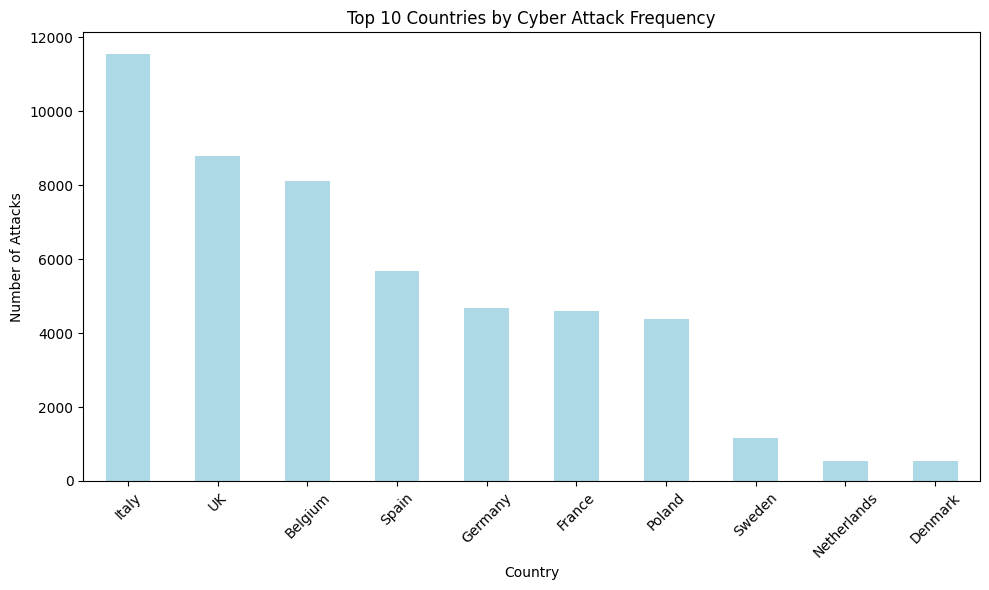

In [17]:
geo_attack_data = data['Country'].value_counts()

plt.figure(figsize=(10, 6))
geo_attack_data.head(10).plot(kind='bar', color='lightblue')
plt.title('Top 10 Countries by Cyber Attack Frequency')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


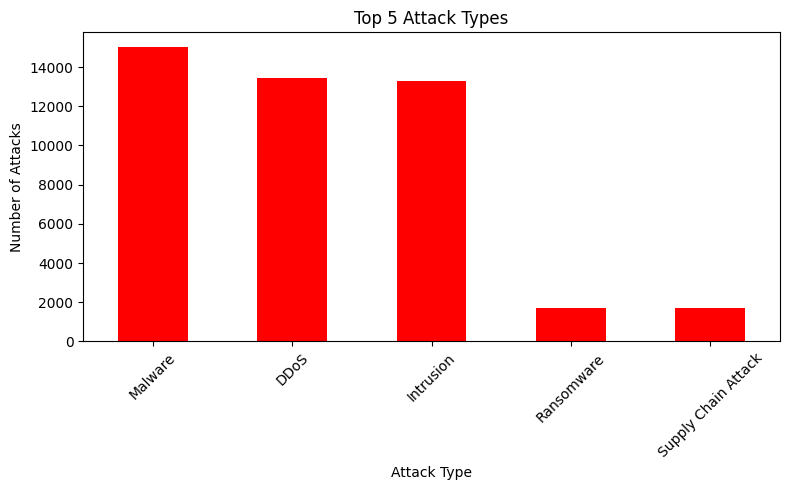

In [18]:
attack_type_distribution = data['Attack_Type'].value_counts().nlargest(5)

plt.figure(figsize=(8, 5), dpi=100)
attack_type_distribution.plot(kind='bar', color='red')
plt.title('Top 5 Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


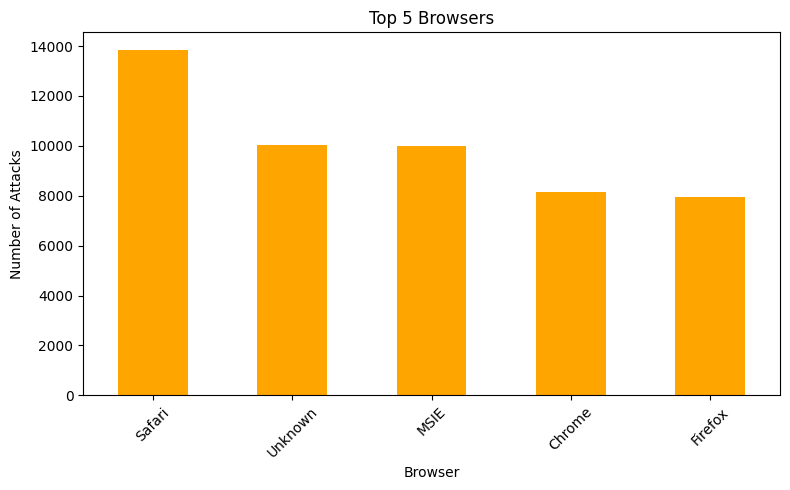

In [19]:
browser_distribution = data['Browser'].value_counts().nlargest(5)
plt.figure(figsize=(8, 5), dpi=100)
browser_distribution.plot(kind='bar', color='orange')
plt.title('Top 5 Browsers')
plt.xlabel('Browser')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


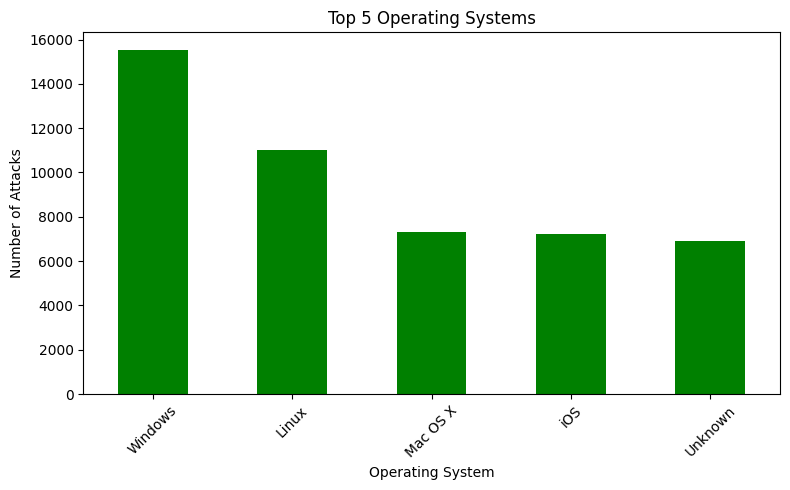

In [20]:
os_distribution = data['Operating_System'].value_counts().nlargest(5)
plt.figure(figsize=(8, 5), dpi=100)
os_distribution.plot(kind='bar', color='green')
plt.title('Top 5 Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


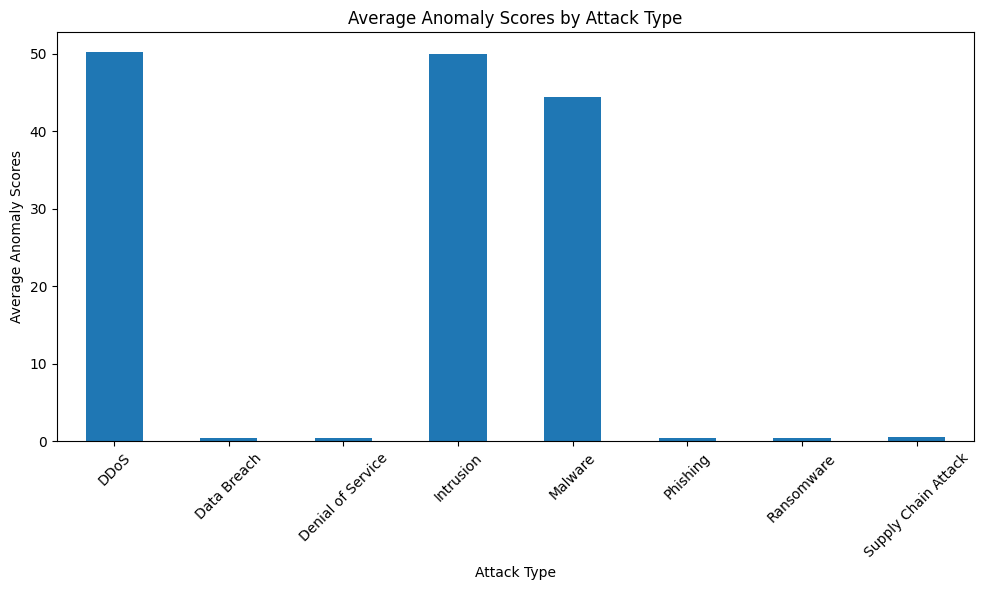

In [21]:
attack_type_anomaly_corr = data.groupby('Attack_Type')['Anomaly_Scores'].mean()
plt.figure(figsize=(10, 6))
attack_type_anomaly_corr.plot(kind='bar')
plt.title('Average Anomaly Scores by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Average Anomaly Scores')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


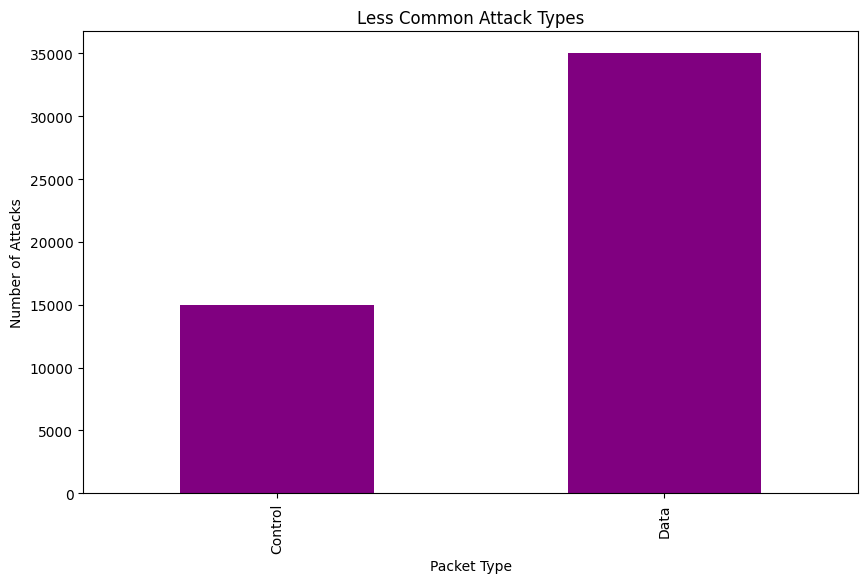

In [22]:
less_common_attack_types = data.groupby('Packet_Type').size().sort_values(ascending=True).head(10)
plt.figure(figsize=(10, 6))
less_common_attack_types.plot(kind='bar', color='purple')
plt.title('Less Common Attack Types')
plt.xlabel('Packet Type')
plt.ylabel('Number of Attacks')

plt.show()


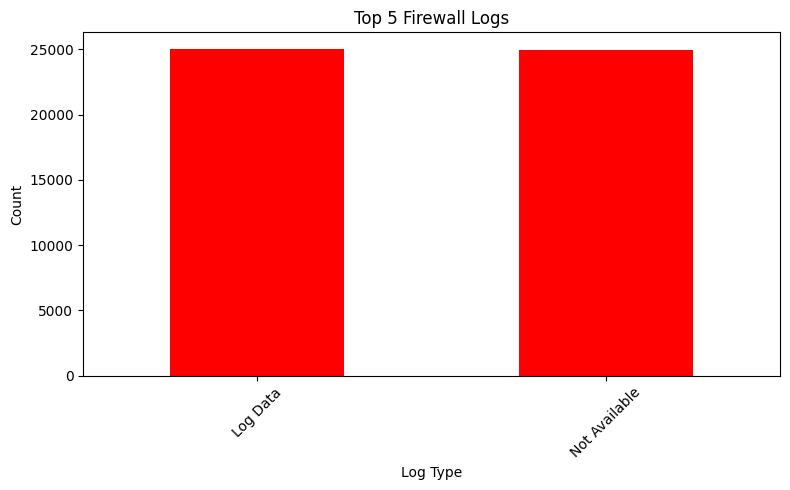

In [23]:
firewall_logs = data['Firewall_Logs'].value_counts().nlargest(5)
ids_ips_alerts = data['IDS_IPS_Alerts'].value_counts().nlargest(5)
plt.figure(figsize=(8, 5))
firewall_logs.plot(kind='bar', color='red')
plt.title('Top 5 Firewall Logs')
plt.xlabel('Log Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


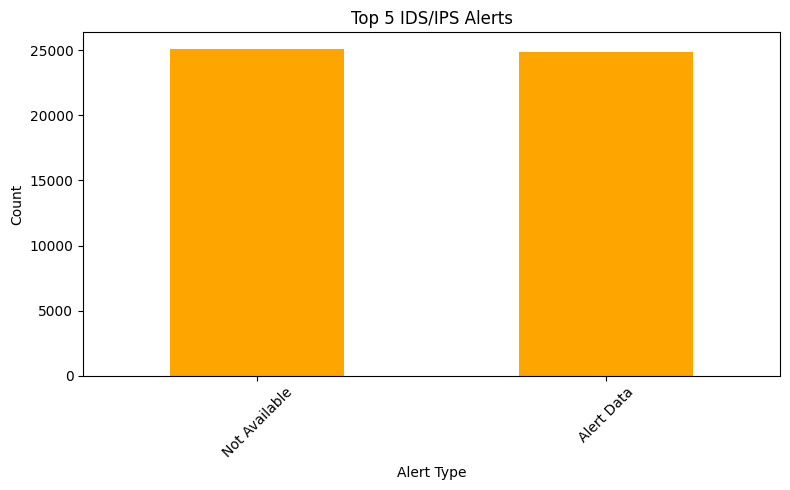

In [24]:
plt.figure(figsize=(8, 5))
ids_ips_alerts.plot(kind='bar', color='orange')
plt.title('Top 5 IDS/IPS Alerts')
plt.xlabel('Alert Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


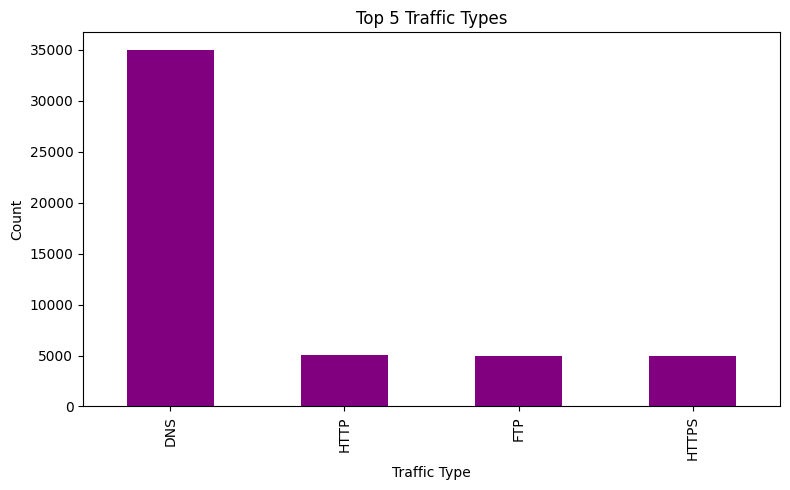

In [25]:
traffic_type_distribution = data['Traffic_Type'].value_counts().nlargest(5)
payload_data_distribution = data['Payload_Data'].value_counts().nlargest(5)
plt.figure(figsize=(8, 5))
traffic_type_distribution.plot(kind='bar', color='purple')
plt.title('Top 5 Traffic Types')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



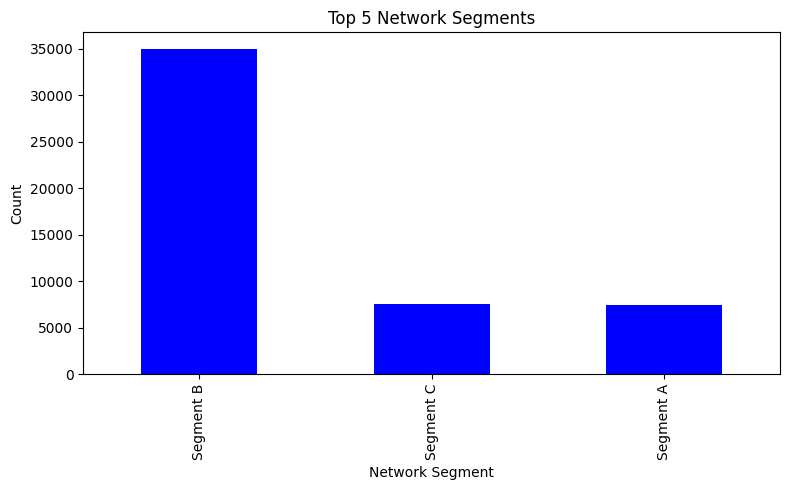

In [26]:
network_segment_distribution = data['Network_Segment'].value_counts().nlargest(5)
proxy_info_distribution = data['Proxy_Information'].value_counts().nlargest(5)

plt.figure(figsize=(8, 5))
network_segment_distribution.plot(kind='bar', color='blue')
plt.title('Top 5 Network Segments')
plt.xlabel('Network Segment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


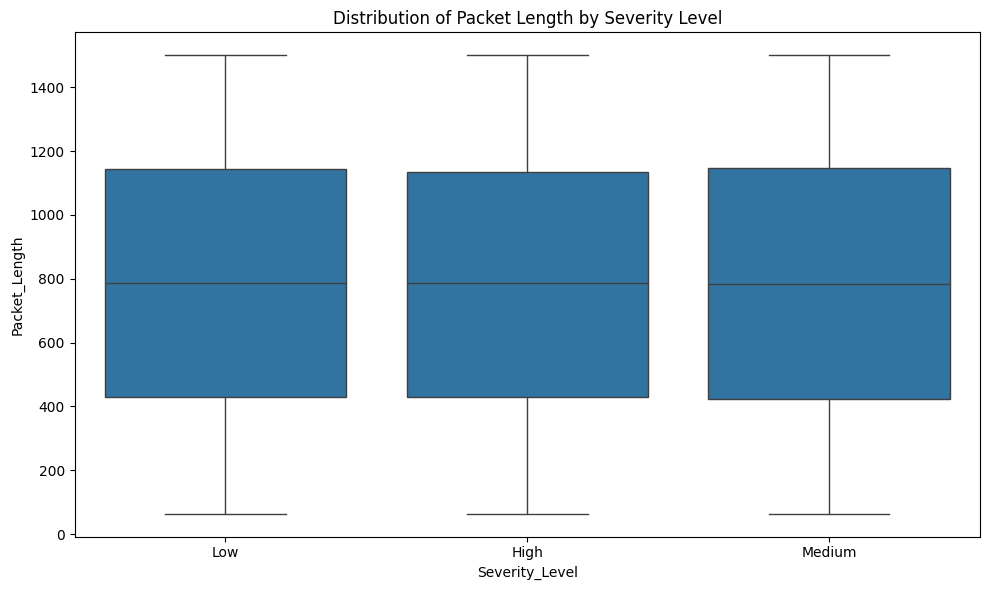

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity_Level', y='Packet_Length', data=data)
plt.title('Distribution of Packet Length by Severity Level')
plt.tight_layout()

plt.show()


## Stacked Plots

<Figure size 1000x600 with 0 Axes>

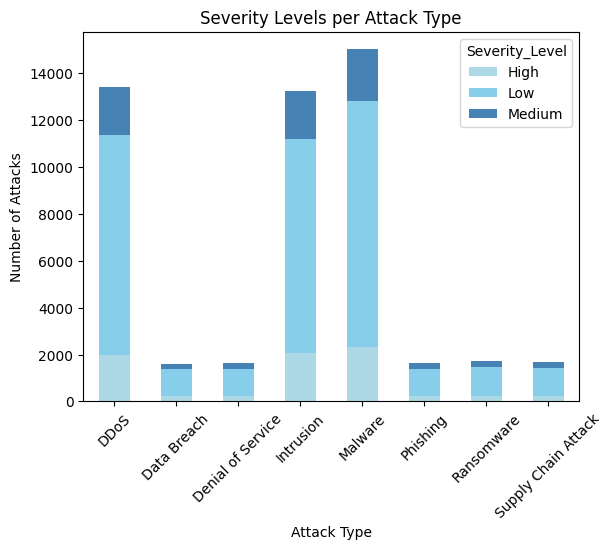

In [28]:
plt.figure(figsize=(10, 6))
severity_vs_attack_type.plot(kind='bar', stacked=True, color=['#ADD8E6', '#87CEEB', '#4682B4', '#1E90FF', '#4169E1', '#000080'])
plt.title('Severity Levels per Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)

plt.show()


<Figure size 1000x600 with 0 Axes>

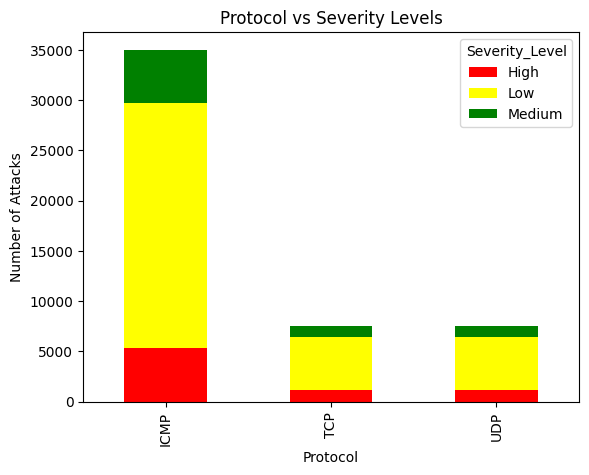

In [29]:
protocol_vs_severity = data.groupby(['Protocol', 'Severity_Level']).size().unstack().fillna(0)
plt.figure(figsize=(10, 6))
protocol_vs_severity.plot(kind='bar', stacked=True, color=['red', 'yellow', 'green'])
plt.title('Protocol vs Severity Levels')
plt.xlabel('Protocol')
plt.ylabel('Number of Attacks')

plt.show()


<Figure size 1000x600 with 0 Axes>

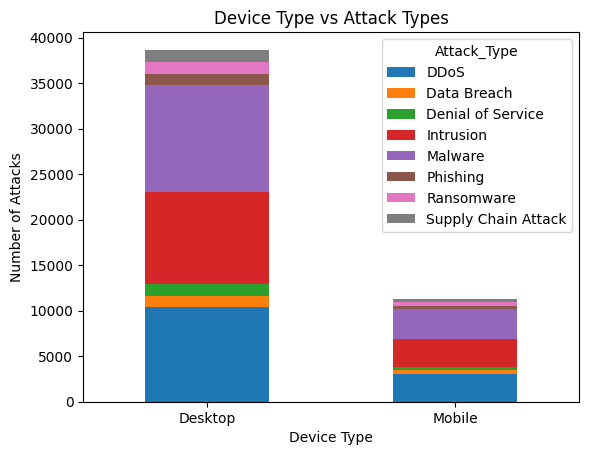

In [30]:
device_vs_attack_type = data.groupby(['Device_Type', 'Attack_Type']).size().unstack().fillna(0)
plt.figure(figsize=(10, 6))
device_vs_attack_type.plot(kind='bar', stacked=True)
plt.title('Device Type vs Attack Types')
plt.xlabel('Device Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=0)

plt.show()


<Figure size 800x500 with 0 Axes>

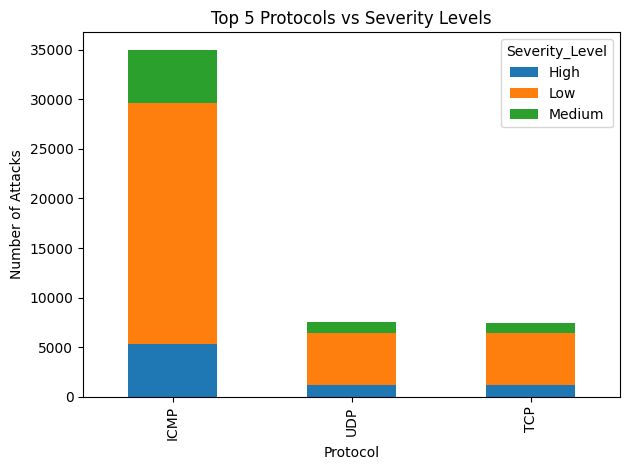

In [31]:
protocol_vs_severity = data.groupby(['Protocol', 'Severity_Level']).size().unstack().fillna(0)
protocol_vs_severity = protocol_vs_severity.loc[protocol_vs_severity.sum(axis=1).nlargest(5).index]  # Limit to top 5 protocols

plt.figure(figsize=(8, 5), dpi=100)
protocol_vs_severity.plot(kind='bar', stacked=True)
plt.title('Top 5 Protocols vs Severity Levels')
plt.xlabel('Protocol')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

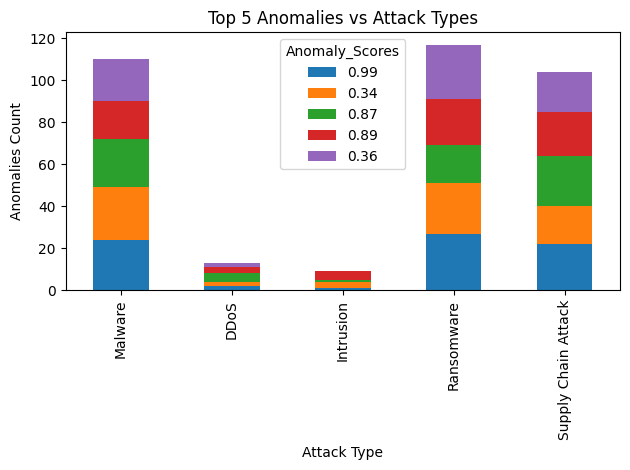

In [32]:
anomalies_vs_attack_type = data.groupby(['Attack_Type', 'Anomaly_Scores']).size().unstack().fillna(0)

top_attack_types = anomalies_vs_attack_type.sum(axis=1).nlargest(5).index
anomalies_vs_attack_type = anomalies_vs_attack_type.loc[top_attack_types]

top_anomaly_scores = anomalies_vs_attack_type.sum(axis=0).nlargest(5).index
anomalies_vs_attack_type = anomalies_vs_attack_type[top_anomaly_scores]

plt.figure(figsize=(8, 5), dpi=100)
anomalies_vs_attack_type.plot(kind='bar', stacked=True)
plt.title('Top 5 Anomalies vs Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Anomalies Count')

plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

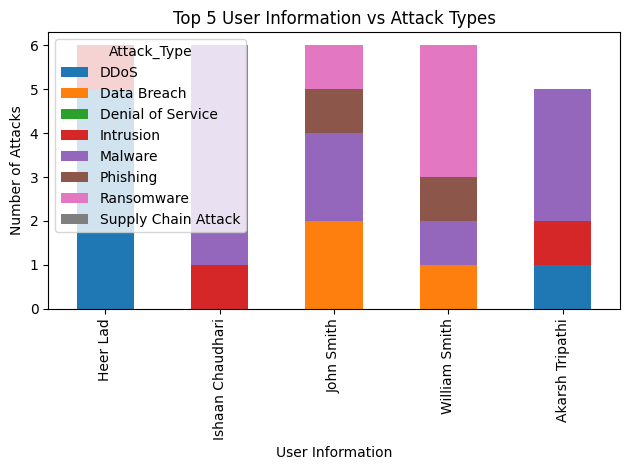

In [33]:
user_vs_attack_type = data.groupby(['User_Information', 'Attack_Type']).size().unstack().fillna(0)
user_vs_attack_type = user_vs_attack_type.loc[user_vs_attack_type.sum(axis=1).nlargest(5).index]

plt.figure(figsize=(8, 5), dpi=100)
user_vs_attack_type.plot(kind='bar', stacked=True)
plt.title('Top 5 User Information vs Attack Types')
plt.xlabel('User Information')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

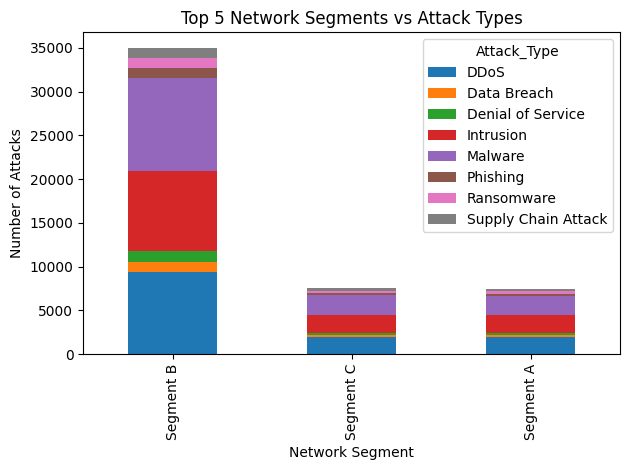

In [34]:
network_segment_vs_attack_type = data.groupby(['Network_Segment', 'Attack_Type']).size().unstack().fillna(0)
network_segment_vs_attack_type = network_segment_vs_attack_type.loc[network_segment_vs_attack_type.sum(axis=1).nlargest(5).index]

plt.figure(figsize=(8, 5), dpi=100)
network_segment_vs_attack_type.plot(kind='bar', stacked=True)
plt.title('Top 5 Network Segments vs Attack Types')
plt.xlabel('Network Segment')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()


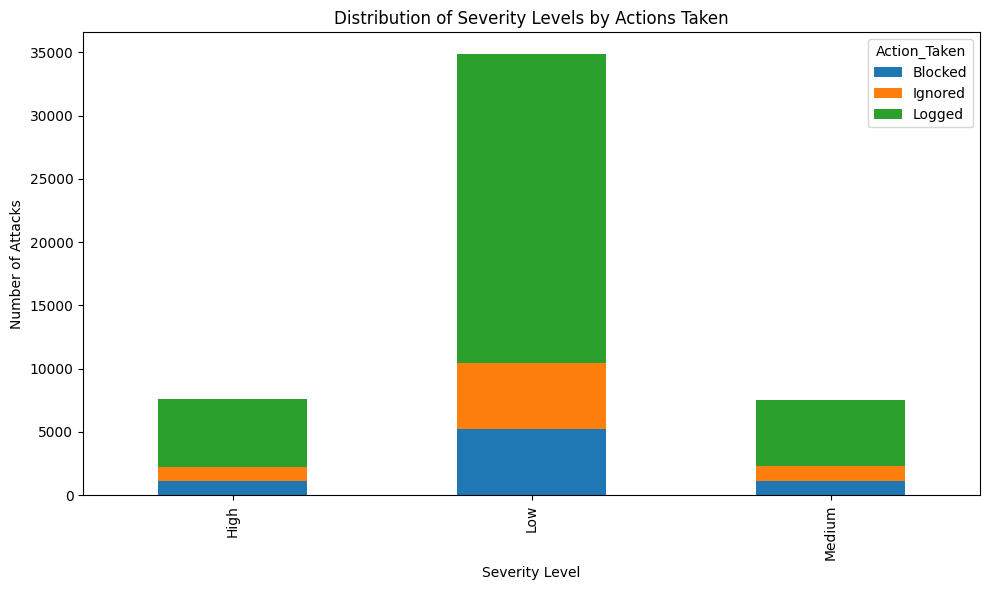

In [35]:
severity_action_data = data.groupby(['Severity_Level', 'Action_Taken']).size().unstack().fillna(0)

severity_action_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Severity Levels by Actions Taken')
plt.xlabel('Severity Level')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

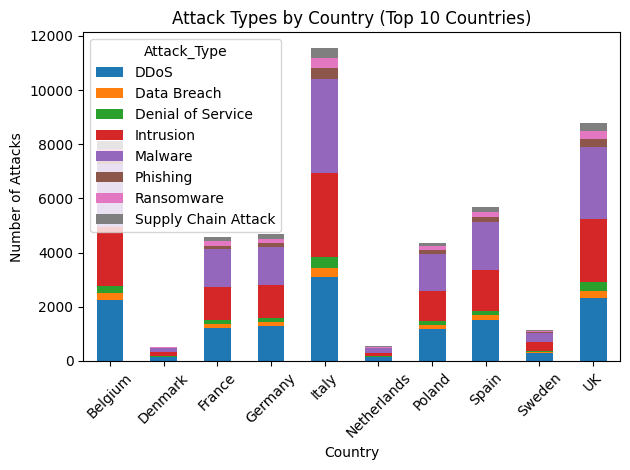

In [36]:
geo_attack_type_data = data.groupby(['Country', 'Attack_Type']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
geo_attack_type_data.head(10).plot(kind='bar', stacked=True)
plt.title('Attack Types by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Time Series

In [37]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # Ensure the Timestamp is datetime format
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day
data['Month'] = data['Timestamp'].dt.month
data['Year'] = data['Timestamp'].dt.year

In [38]:
attacks_per_hour = data.groupby('Hour').size()
attacks_per_day = data.groupby('Day').size()
attacks_per_month = data.groupby('Month').size()
attacks_per_year = data.groupby('Year').size()


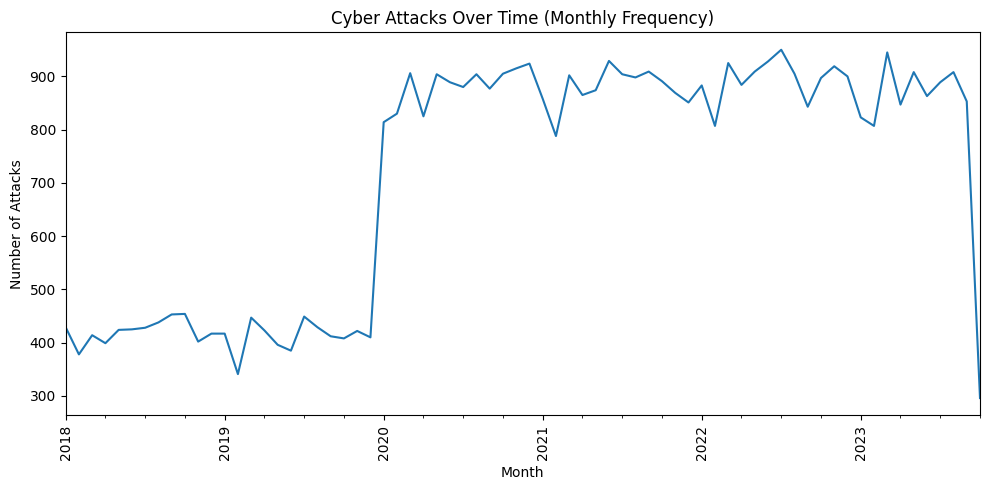

In [39]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d %H:%M:%S')

data['YearMonth'] = data['Timestamp'].dt.to_period('M')
time_series_data = data.groupby('YearMonth').size()

plt.figure(figsize=(10, 5), dpi=100)
time_series_data.plot()
plt.title('Cyber Attacks Over Time (Monthly Frequency)')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


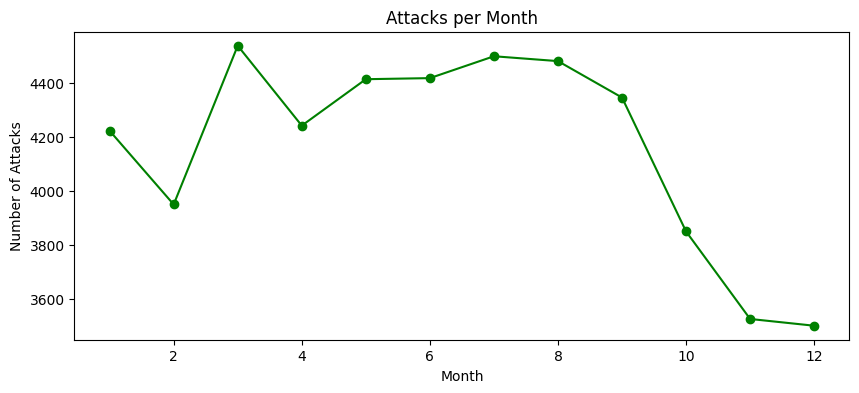

In [40]:
plt.figure(figsize=(10, 4))
attacks_per_month.plot(kind='line', marker='o', color='green')
plt.title('Attacks per Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')

plt.show()


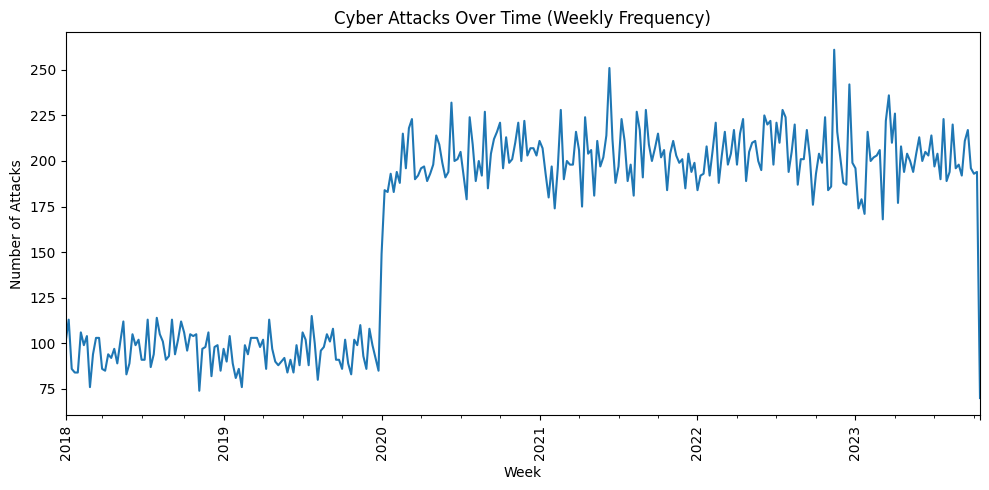

In [41]:
data['Week'] = data['Timestamp'].dt.to_period('W')
weekly_attack_data = data.groupby('Week').size()
plt.figure(figsize=(10, 5))
weekly_attack_data.plot()
plt.title('Cyber Attacks Over Time (Weekly Frequency)')
plt.xlabel('Week')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


<Figure size 1200x600 with 0 Axes>

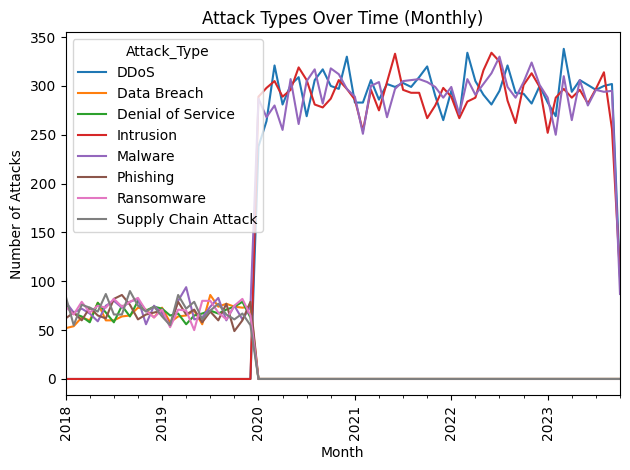

In [42]:
attack_type_trend = data.groupby([data['Timestamp'].dt.to_period('M'), 'Attack_Type']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
attack_type_trend.plot()
plt.title('Attack Types Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


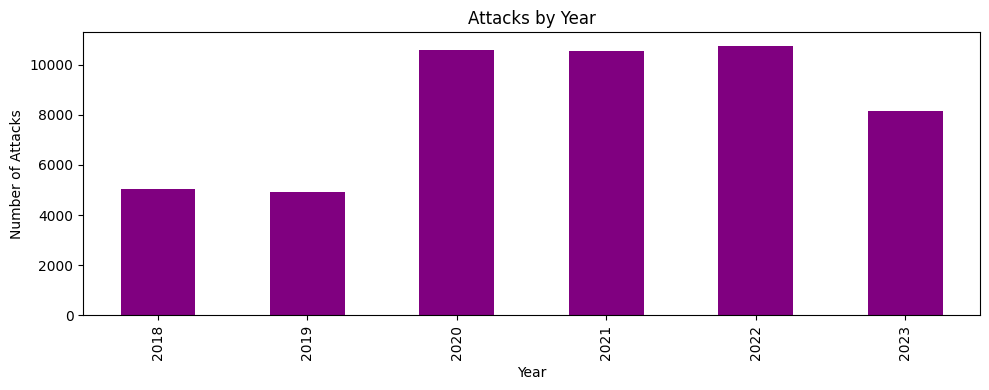

In [43]:
plt.figure(figsize=(10, 4), dpi=100)
attacks_per_year.plot(kind='bar', color='purple')
plt.title('Attacks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.tight_layout()

plt.show()


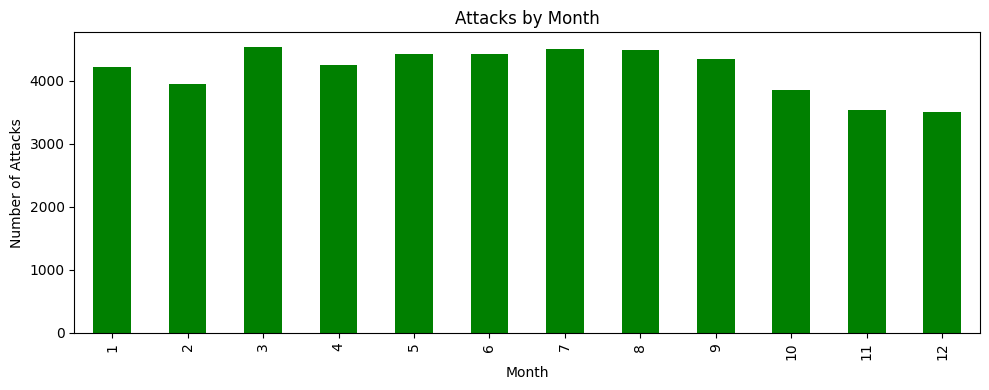

In [44]:
plt.figure(figsize=(10, 4), dpi=100)
attacks_per_month.plot(kind='bar', color='green')
plt.title('Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.tight_layout()

plt.show()


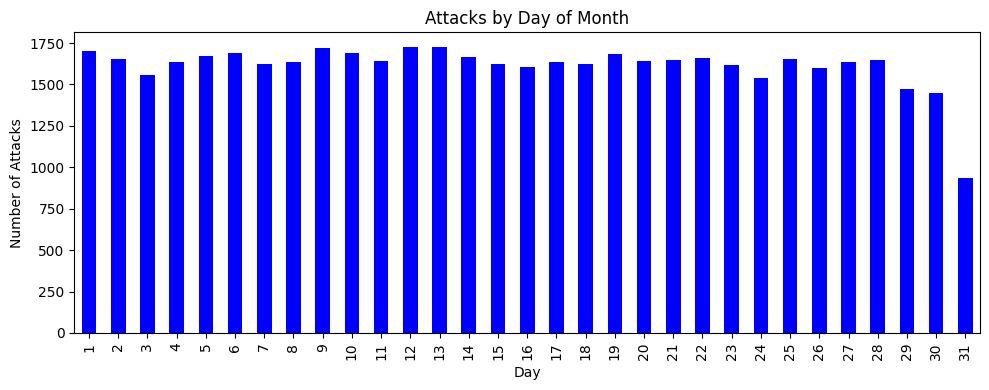

In [45]:
plt.figure(figsize=(10, 4), dpi=100)
attacks_per_day.plot(kind='bar', color='blue')
plt.title('Attacks by Day of Month')
plt.xlabel('Day')
plt.ylabel('Number of Attacks')
plt.tight_layout()

plt.show()


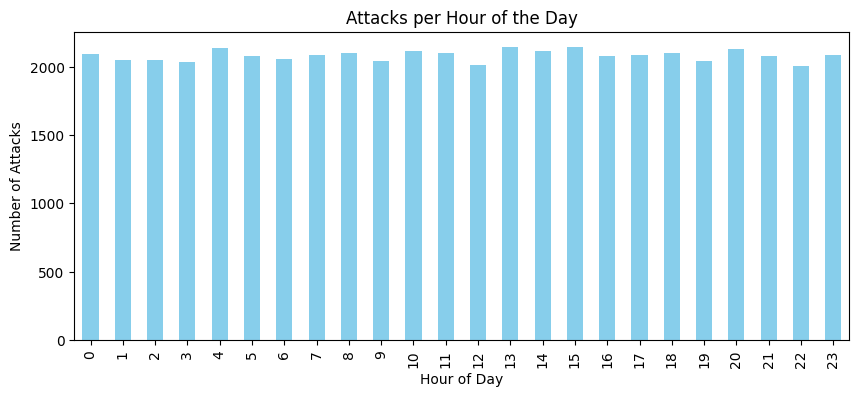

In [46]:

plt.figure(figsize=(10, 4))

attacks_per_hour.plot(kind='bar', color='skyblue')
plt.title('Attacks per Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Attacks')

plt.show()
